# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [14]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
from scipy.stats import pearsonr
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,u'Relationship between CRIM and Price')

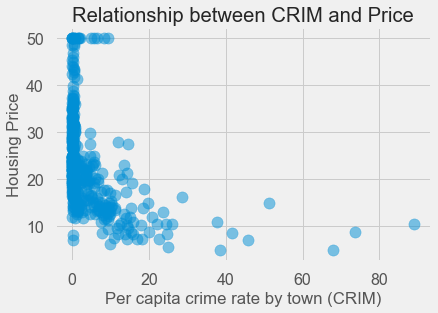

In [49]:
plt.scatter(bos.CRIM, bos.PRICE,alpha=.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship
There seems to be a slight negative linear relationship. Several outliers near the top and right of the graph cause the other points to appear bunched near the left of the grpah. There also appear to be almost a ceiling to the prices. 

Text(0.5,1,u'Relationship between RM and Price')

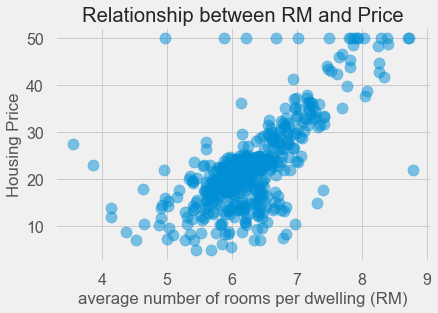

In [111]:
# your turn: scatter plot between *RM* and *PRICE*
plt.style.use('fivethirtyeight')
plt.scatter(bos.RM, bos.PRICE,alpha=.5)
plt.xlabel("average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


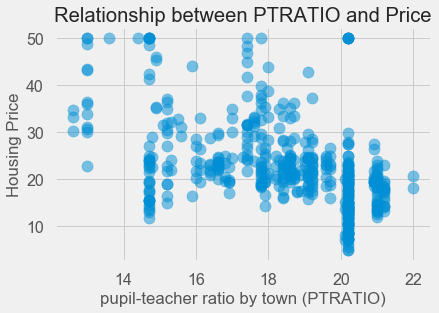

('Pearson correlation coefficient,2-tailed p-value:', (-0.5077866855375619, 1.6095094784731157e-34))


In [112]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE,alpha=.5)
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()
print('Pearson correlation coefficient,2-tailed p-value:',pearsonr(x=bos.PTRATIO, y=bos.PRICE))


Ihe the Room to Price graph, we see a strong positive linear relationship. As the number of room increase so does the price. This makes perfect logical sense. People want more space and are willing to pay for it. The pupil-teacher ratio is quite different. We get vertical bands around certain values, which is probably a function of how schools organize class sizes. School districts probably set limits on maximum student class size and you can see classrooms organize around these limits. Notice how there appears to be a slight trend downward among the entire band as pupil to teacher ratio increases. We that the more populated classrooms are more likely to be in communities with lower house values.

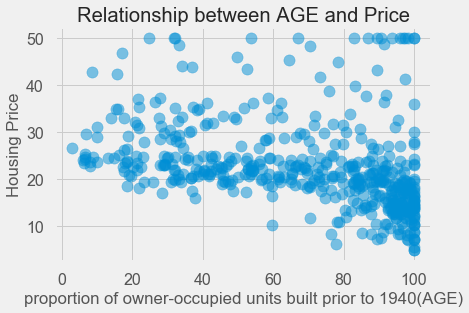

('Pearson correlation coefficient,2-tailed p-value:', (-0.37695456500459618, 1.5699822091882979e-18))


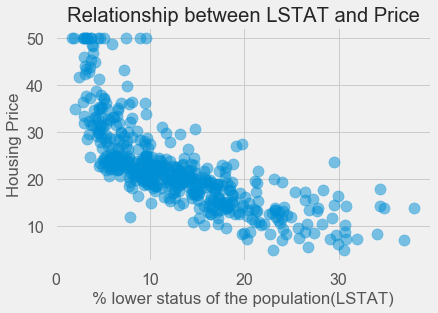

('Pearson correlation coefficient,2-tailed p-value:', (-0.73766272617401474, 5.0811033943890015e-88))


In [123]:
# your turn: create some other scatter plots
# plot price and age columns
plt.scatter(bos.AGE, bos.PRICE,alpha=.5)
plt.xlabel("proportion of owner-occupied units built prior to 1940(AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")
plt.show()
print('Pearson correlation coefficient,2-tailed p-value:',pearsonr(x=bos.AGE, y=bos.PRICE))
#plot LSTAT vs price
plt.scatter(bos.LSTAT, bos.PRICE,alpha=.5)
plt.xlabel("% lower status of the population(LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")
plt.tight_layout
plt.show()
print('Pearson correlation coefficient,2-tailed p-value:',pearsonr(x=bos.LSTAT, y=bos.PRICE))



The AGE graph tells us that houses that are newer then 1940 also see higher demand or desire to be purchased. This makes sense as newer houses tend to have less maintenance costs. A newer larger house is going to cost you more than an older smaller one, and even more if you want to live among higher status residents, in uncrowded schools with low crime.

The LSTAT graph plotting the percent of lower status population against house values indicates this variable has a high negative linear relationship. If you live among a community that identifies as more proportionally lower status then you will pay less for a similiar house in a higher status community. This suggests that there exists class discrimination, between communities of higher and lower status. One that affects house prices by rising them in higher status communities and one can reasonable suspect in order to keep lower status people out of the community by out pricing them. 

As we can see there are many contributing variables to explain the price of a house. House prices move lower when crime is high, when the proportion of lower status of the population is high, and when school-teacher ratios are high. If we think of price in economic terms, then a higher house price indictates higher demand or a higher desire to live in the community. The trends then indicate that communities with high crime, crowded schools, and lower wage residents are less desired among home buyers. Houses that offer larger living spaces, higher average number of rooms per dwelling, are in higher demand. Houses that are newer then 1940 also see higher demand or desire to be purchased. This makes sense as newer houses tend to have less maintenance costs. A newer larger house is going to cost you more than an older smaller one, and even more if you want to live among higher status residents, in uncrowded schools with low crime.  

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

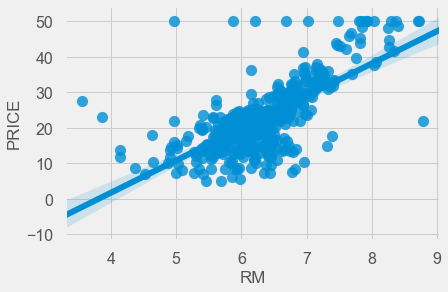

In [124]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


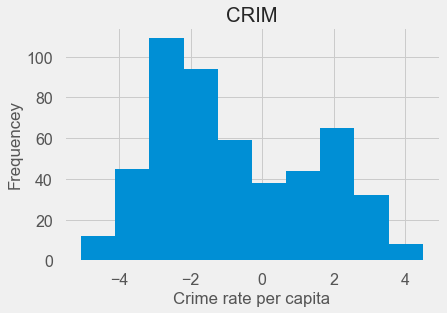

In [125]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot histograms for *RM* and *PTRATIO*, along with the two variables you picked in the previous section.</p>
</div>

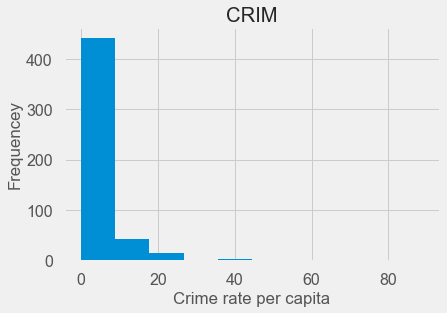

In [126]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

## Question: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?
 
 We took the log to transform the data; altering the scale in an attempt to make the variable more "normally" distributed. In doing so we see that we have a bimodal histogram. This leds us to suspect the presence of two distributions being combined to make this histogram or a shift in the mean over a period of time. 
 
 

## Exercise: Plot histograms for RM and PTRATIO, along with the two variables you picked in the previous section.

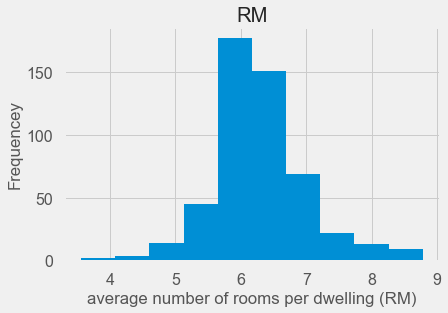

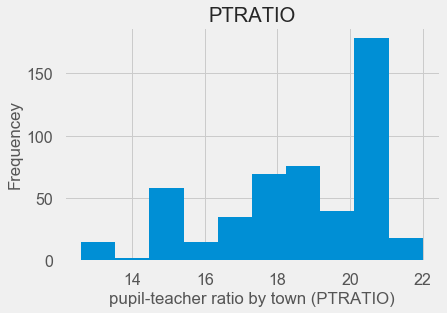

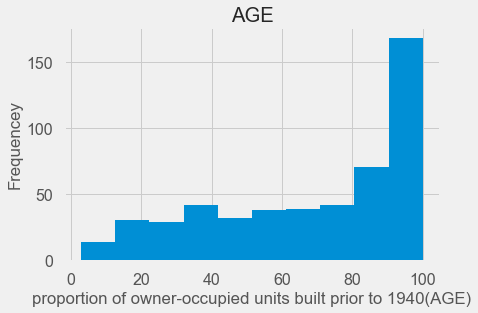

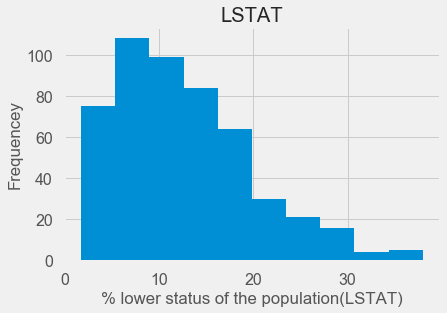

In [133]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("average number of rooms per dwelling (RM)")
plt.ylabel("Frequencey")
plt.show()

plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Frequencey")
plt.show()

plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("proportion of owner-occupied units built prior to 1940(AGE)")
plt.ylabel("Frequencey")
plt.show()



plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population(LSTAT)")
plt.ylabel("Frequencey")
plt.show()


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [127]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/luca/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [128]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           2.49e-74
Time:                        14:47:27   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

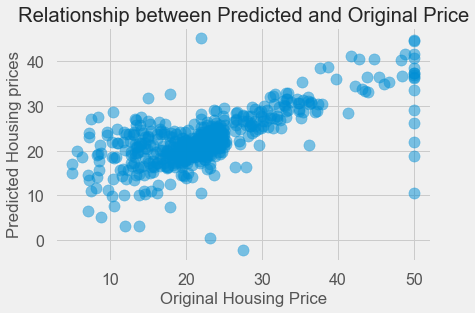

In [144]:
# your turn
plt.scatter(bos.PRICE,m.fittedvalues,alpha=.5)
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted Housing prices")
plt.title("Relationship between Predicted and Original Price")
plt.show()



The scatterplot indicates a positive correlation. The model does not do a great job a predicting house prices for lower values (original prices below 10) the prediction is usually high and for higher values (original prices above 30) the predictor consistantly under values the house. Notice that the very top end of something strange is going on. We see a wide variety of predictions. 

### Fitting Linear Regression using `sklearn`


In [145]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [146]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


# your turn
One option: Is to simple drop the constant term. This forces the regression line to go through the origin, however, it will artificially affect the slope. (Note this can give an artificially higher R^2 but not one of value). 

Second option Subtracting the mean of each variable from the variable before performing the regression. This should force the intercept to be zero without affecting the slope. (The mean of the x terms and y terms will be zero.)

'From an economic point of view, a constant term usually has little or no explanatory virtues’-Theil (1971, p. 176). In some models, the intercept term does not make logical sense. If you are modeling fuel consumption based on wieght, how can a vehicle with no wieght consume energy. 

I would contend that if you know for a fact that the measurement/observation should be zero at the origin then it would be allowable to drop the constant term. It is worth noting that some scholars argee that this term can help to handle measurement error, calibration issues, timing problems, and other unknowns even in such situations. 

In this example, I see no overhelming reason to drop the constant. Dropping it does make logical since in that a house with no rooms, no house at all, should be priced at zero. However, by doing so you will alter values near the origin, which we do not have exact knowlege on. In  leaving the intercept in, the model should give better predictions near the origin. 

No, Y does not have to be normally distributed, however, you do need the residuals to be I.I.D. and normally distributed. In other words you want the variability not explained by the model (predictors) to be normally distributed. 
 


## Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

Independently simply means that one observation (one row's variables/column values) does not depend on any other observation. 

Identically distributed means that all observation come from the same probability distribution.

The residuals are just the differences between the observed value and predicted values. 

No, it is not enough that residuals be normally distributed. You can be normally distributed but not independent. This is called autocorrelation and will can lead to OLS not being the best linear unbiased estimator. You should be able to take that knowledge from the previous data to find a better fitting line. If you can have a subset from different normal distribution (ones with different means and variances), then the residuals will not be identically distributed. Different variances in OLS cause the variance not to constant thus the linear regression model has what is called heteroscedastic errors. Heteroscedastic errors can lead to poor estimates.

The residuals must meet all three assumptions for OLS to work best that is for OLS to predict the best linear unbaised estimate. 



### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [147]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4911032804


In [148]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [149]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [150]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

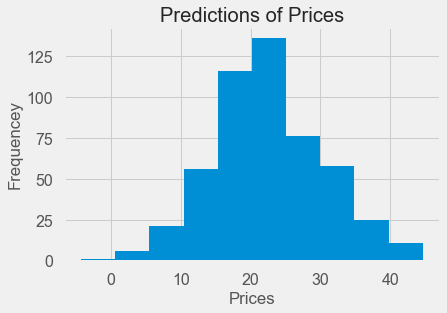

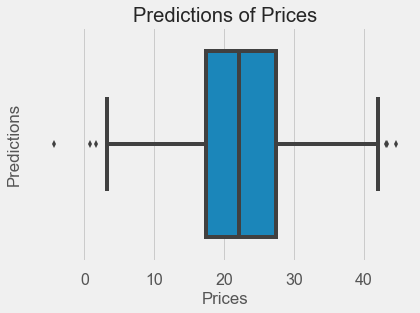

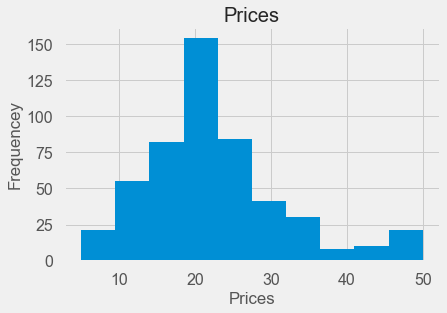

In [193]:
# your turn
plt.hist(lm.predict(X))
plt.title("Predictions of Prices")
plt.xlabel("Prices")
plt.ylabel("Frequencey")
plt.show()

sns.boxplot(lm.predict(X))
plt.title("Predictions of Prices")
plt.xlabel("Prices")
plt.ylabel("Predictions")
plt.show()

plt.hist(bos.PRICE)
plt.title("Prices")
plt.xlabel("Prices")
plt.ylabel("Frequencey")
plt.show()



In [194]:
pred=lm.predict(X)
np.std(pred)

7.9070713249902997

## Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

The distribution of predictions is bell shaped, centered on 22.53 with a variance of 62.52, and a standard deviation of 7.91. It resembles the histogram of prices closely. There are several outliers, 3 on the lower end and two on the higher end. These suggest that the model has some error in it, some information that we are not using to better predict the accurate price. The most concerning is the lowest data point which is negative, obviously a nonsensical prediction. The others outliers could be useful since there are outliers in the original data, and in the real world. I would consider discarding the negative value predictions if it improved the model fit. 

We see that modeling the data using OLS with 13 coefficients does a reasonable job capturing the distribution of housing prices from the Boston data. 




## Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with statsmodels before).



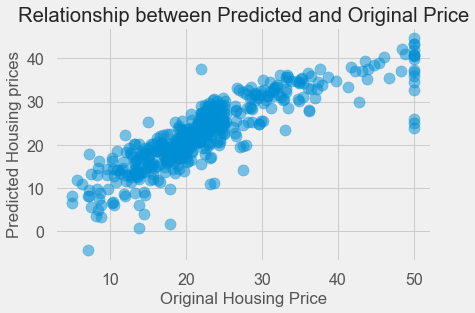

In [202]:
plt.scatter(bos.PRICE,pred,alpha=.5)
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted Housing prices")
plt.title("Relationship between Predicted and Original Price")
plt.show()


## Exercise: We have looked at fitting a linear model in both statsmodels and scikit-learn. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does statsmodels provide?

Statsmodel allows easier manipulation of the formula for OLS but is much more user intensive. It's additional learning curve up front in data set up and formula manipulation does allow for more complex utility later. The Statsmodel package once mastered is easier to to treat variables as categorical, transform data, or fit a model more uniquely. Scikit-Learn has a more out of the box utility for basic and frequently used methods. Scikit-Learn has a nice work flow for most machine learning / statitics for fitting, predicting, and scoring. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [195]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.2762841


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [196]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.25398642158e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Make a scatterplot of `PTRATIO` and housing price. Tell a story about the relationship between the variables.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

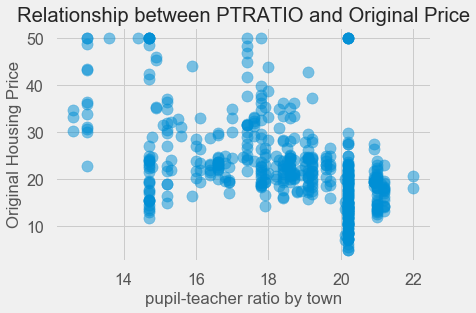

In [204]:
plt.scatter(bos.PTRATIO,bos.PRICE,alpha=.5)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Original Housing Price")
plt.title("Relationship between PTRATIO and Original Price")
plt.show()

In this scatterplot, we see that the housing prices are stratified into bands by the pupil-teacher ratio with the bands trending downward in house values as the pupil-teacher ratio increases. A dishearting story of lower income housing forcing students into crowded classrooms. However, the width of the bands does show that there is quite a bit variance among housing prices within each of this pupil-teacher ratios.  

## Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

In [213]:
X_ptratio=bos.PTRATIO.values.reshape(-1,1)
lm.fit(X_ptratio, bos.PRICE)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))
# The coefficients
print('Estimated Coefficients: {}'.format(lm.coef_))

Estimated intercept coefficient: 62.3446274748
Number of coefficients: 1
Estimated Coefficients: [-2.1571753]


We see that the model using only the PRTATIO coeffiecient will predict a reduction in housing price from the original. We see that for each unit increase in pupil to teacher there is a decrease of 2.16 in housing price. The intercept does not give us much information a pupil to teacher ratio of zero equates to a house price of $62,344. This is a situation where we can ignore the intercept interpretation.  

## Exercise: Calculate (or extract) the  R2 value. What does it tell you?

The R^2 score below, .2578, tells us that this model fits the data very poorly. It explains only 26% of the variance of the original house prices. 

In [217]:
lm.score(X_ptratio,bos.PRICE)

0.257847318009223

## Exercise: Compute the  F-statistic. What does it tell you?

We use an  F-test for this.
 
    -The null hypothesis is that all of the  β coefficients are zero, that is, none of them have any effect on  Y.
    
    -The alternative is that at least one  β coefficient is nonzero:

    H0:βi=0,for all i
    HA:βi>0,for some i

Once we compute the  F-statistic, we can use the  F distribution with  N−K and  K−1 degrees of degrees of freedom to get a p-value.

We see below that the p_value is zero thus we reject the null hypothesis. There is only one coefficient in the model so we know that the ratio of pupil to teacher does has a statistical significant affect upon the price of houses in the Boston Data set.

In [302]:
#statmodel ols for pupil-teacher predicting price
ols_p = ols('PRICE ~ PTRATIO',bos).fit()
ols_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           1.61e-34
Time:                        11:54:08   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise: Take a close look at the  F-statistic and the  t-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in simple linear regression models.
The F-test and the t-test both reject the null hypothesis that pupil to teacher ratio do not affect house prices. The test seem to agree in simple linear regression models. The p-value from the t-test is the probability of recording a t-value as extreme as the observed value. The p-value for the F-test is the probability of getting as large an F-value as the observed one. These two p-values should agree in simple linear regression.  
 
The F-statistic can be thought of as a ratio of two estimates of variance. The t-statistic can be thought of as the ratio of two estimates of standard deviation, and the square of t as being the ratio of two estimates of variance. 

Note: not an intuitive way to think of the t-statistic but with a bit of math can shown it. 


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [303]:
# your turn
ols_3 = ols('PRICE ~ PTRATIO + RM + CRIM',bos).fit()
ols_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           1.09e-97
Time:                        15:23:32   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
RM             7.3816      0.402     18.360      0.000       6.592       8.171
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 The F-statistic is 244.2 equates to a p-value of 1.09e-97. This tells us that a least one of the coefficients has a statistically significant affect upon the prediction of house prices. 

The  R-squared value of	0.593 tells us that almost 60% of the variance in our predicted price is captured by our model.

The coefficients for PTRATIO is -1.0742, for RM is 7.3816, and for CRIM is -0.2021 We glean from this that the room per dwelling contributes the most in predicting house price, since its absolute value of the coeffiecient is largest. The fact that it is positive tells us that has room size grows so does house price. You can expect to pay more for a house with a larger number of rooms. The other two coeffiecients contribute contribute much less and crime very little. However, both  have t-statitical p-values small enough to make thier contribution to the predicted house value statistically significant. The negative sign on both of these coefficients tells us that as crime increases or pupil-to-teacher ratio increases you can expect a lower value of house price. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{full} - RSS_{reduced}}{K_{full} - K_{reduced}} \right)}{\left( \frac{RSS_{reduced}}{N - K_{reduced}} \right)}$$

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [305]:
ols_5 = ols('PRICE ~ PTRATIO + RM + CRIM + AGE + LSTAT',bos).fit()
ols_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     215.8
Date:                Tue, 20 Mar 2018   Prob (F-statistic):          2.46e-122
Time:                        15:47:50   Log-Likelihood:                -1549.3
No. Observations:                 506   AIC:                             3111.
Df Residuals:                     500   BIC:                             3136.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6409      3.982      4.430      0.000       9.817      25.465
PTRATIO       -0.9061      0.119     -7.621      0.000      -1.140      -0.673
RM             4.4543      0.436     10.223      0.000       3.598       5.310
CRIM          -0.0684      0.031     -2.222      0.027      -0.129      -0.008
AGE            0.0185      0.011      1.744      0.082      -0.002       0.039
LSTAT         -0.5849      0.054    -10.927      0.000      -0.690      -0.480
==============================================================================
Omnibus:                      203.481   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1002.989
Skew:                           1.725   Prob(JB):                    1.60e-218
Kurtosis:                       8.972   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A F-test: 
Let model 1 be the OLS with three variables from before (ols_3) and let model 2 be the OLS with five variables from abobe (ols_5) Then our:
    
Null Hypothesis is that model 2 does not provide a significantly better fit than model 1.

Alternate Hypothesis is that model 2 does provide a significantly better  fit than model 1. 

Our assumption will be with 95% confidence, alpha=.05. 

In [388]:
#compute the f-statistic for nested models (ols w/3 variables and w/5)
f_test_2models= (ols_3.ssr - ols_5.ssr / 2) / (ols_5.ssr /301)

In [393]:
#compute f p_value for two nested models
# input (f-statistic value, degrees of freedom between groups, deg of freedom within)
p_value_f_2m=stats.f.sf(f_test_2models,2, 501)
print('The p-value between model with 3 and with 5 variables is: {}').format(p_value_f_2m) 

The p-value between model with 3 and with 5 variables is: 6.3368913232e-73


We see that the this is well below a significance level of .05 for 95% confidence, therefore we can reject the null hypothesis. Model 2, OLS with five variables fits the data than model 1, OLS with three variables.

We also see that this is true with comparing AIC. OLS_5 has an AIC of 3111 and OLS_3 has an AIC of 3233. Lower values of AIC indicate a better fitting models, hence we come to the same conclusion model 2, OLS_5 is better than OLS_3, model 1. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

## Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

In [414]:
# Your turn.
residuals= bos.PRICE-ols_3.predict()

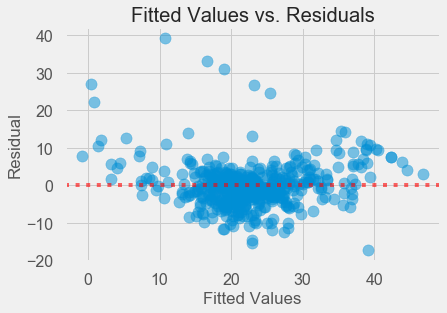

In [438]:
plt.scatter(ols_3.fittedvalues,residuals,alpha=.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.axhline(0,color='r',alpha=.6, linestyle=':',label='estimated regression line')
plt.show()

Our residual vs. fits plot story:

The residuals "bounce randomly" around the y=0 or the expected regression line. This suggests that the assumption that the relationship is linear is reasonable.

The residuals roughly form a "horizontal band" around the y=0 line. This suggests that the variances of the error terms are equal. If we see a bell shape then we would suspect heteroscedastic errors, a violation of the assumption of no multicollinearity (meaning we have different variances in the residuals, or size of the error term differs across values of an independent variable).  

We do have some outliers in our data, thus we see that in our plot here too. 

From this plot we see no voilation of our assumptions.

## Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

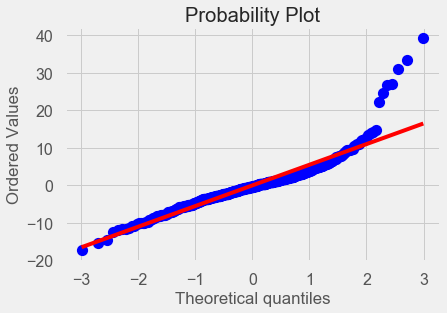

In [439]:
stats.probplot(residuals,plot=plt)
plt.show()

A normal probability plot or a normal quantile plot is used to check if the residuals are normally distributed. We would want to see (and do see) that the plotted residuals closely fit the linear line above. A bow-shaped pattern in these plots reveals that the errors are not normally distributed. We do see a some pull away out in the third quantiles probably due to the fact that we have outliers in the data. 

## Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

Fitted vs.residual curve provides a quick check on linearity, Heteroscedasticity, Independence/No Autocorrelation, and presense of outliers. The quantile plot also gives an idea of linearity, if the distribution is normal, and an idea if there are outliers presence. It is a tool that allows you to quickly see if some assumptions for OLS are violated. The draw back is that the interpretation of these two graphs can be subjective.

## Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.



In [629]:
# find outliers that are beyond 3 standard deviations from the mean
outliers=[]
for i in ols_3.fittedvalues:
    if i < (mean-3*std):
        outliers.append(i)
    elif i > (mean +3*std):
        outliers.append(i)

In [631]:
print('These are the outliers:{}').format(outliers)


These are the outliers:[46.85451290102916, 44.614226317633396, 43.856925295537302, 0.35978301153317815, 0.77683379488521709, -0.89362154933578353]


The outliers in the predicted model results could be due to outliers in the original data. Outliers in the data could be do to many things. A house even through it has all the indicators from our model to be priced high might sell low due to some unknown variable not taken into account. For example, if a murder occured at the house, even through it has high number of rooms people might refuse to buy the house unless discounted extremely. 


## Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

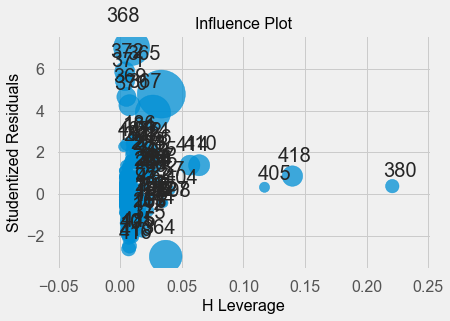

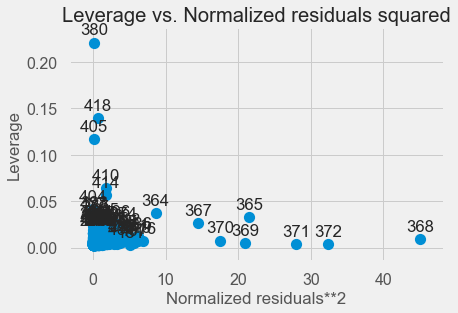

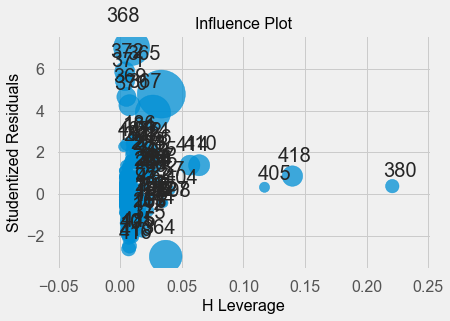

In [576]:
#plot high leverage points
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(ols_3)
influence_plot(ols_3)

In [584]:
print(ols_3.fittedvalues[380],ols_3.fittedvalues[418],ols_3.fittedvalues[405])

(8.4466123078805211, 4.1048467326487454, 3.2167998942808964)


In [628]:
print(new_df.iloc[380],new_df.iloc[418],new_df.iloc[405])

(CRIM        24.3938
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.7000
RM           4.6520
AGE        100.0000
DIS          1.4672
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       28.2800
PRICE       10.5000
Name: 386, dtype: float64, CRIM        37.6619
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6790
RM           6.2020
AGE         78.7000
DIS          1.8629
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B           18.8200
LSTAT       14.5200
PRICE       10.9000
Name: 427, dtype: float64, CRIM        18.8110
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           4.6280
AGE        100.0000
DIS          1.5539
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B           28.7900
LSTAT       34.3700
PRICE       17.9000
Name: 412, dtype: float64)


We watch out for outlying values at the upper right corner or at the lower right corner.  We see that 380, 418, and 405 are good candidates for exclusion. These are the values which have influence against on the regression line. Looking closer we see that these are low valued houses compared to the room number. Something that doesn't fit the rest of the data. At this point, we can only guess at the cause: a superstition concerning the house, a infamous crime committed there, structural problems, or mabye a wierd architecture. 

## Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [580]:
outliers.append(ols_3.fittedvalues[405])

In [581]:
outliers.append(ols_3.fittedvalues[418])

In [582]:
outliers.append(ols_3.fittedvalues[380])

In [595]:
point=dict(ols_3.fittedvalues)

In [604]:
# get values of outliers
indice=[]
for i in outliers:
    for k,v in point.items():
        if v ==i:
            indice.append(k)
#{k:v for k, v in point.items() if v == 3.2167998942808964}

In [617]:
new_df=bos
for i in indice:
    new_df=new_df.drop(new_df.index[i])
    

In [620]:
ols_3_dropped = ols('PRICE ~ PTRATIO + RM + CRIM',new_df).fit()
ols_3_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     286.5
Date:                Tue, 20 Mar 2018   Prob (F-statistic):          1.31e-107
Time:                        23:48:21   Log-Likelihood:                -1542.9
No. Observations:                 497   AIC:                             3094.
Df Residuals:                     493   BIC:                             3111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3901      3.738     -1.174      0.241     -11.735       2.955
PTRATIO       -1.0918      0.124     -8.837      0.000      -1.335      -0.849
RM             7.5923      0.376     20.207      0.000       6.854       8.331
CRIM          -0.2075      0.031     -6.771      0.000      -0.268      -0.147
==============================================================================
Omnibus:                      164.317   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.297
Skew:                           1.303   Prob(JB):                    6.74e-215
Kurtosis:                       9.390   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping the outliers, and refitting the model our regression fit has improved. The R^2 was 0.593 and now it is 0.635. The high leveraged points and outliers did influence the model's ability to fit data. We now have a better model.